### Libraries

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
#import dataset as CSV file

df = pd.read_csv('Employee.csv')

### Data Viewing

In [ ]:
#It displays the first five rows of the sample data

df.head()

In [ ]:
#It displays the last five rows of the sample data

df.tail()

In [ ]:
#df.sample(n) - It displays the random n number of rows in the sample data

df.sample(4)

In [ ]:
#It displays the sample data's rows and columns

df.shape 

#It signifies that our dataset has 4653 rows, each containing 13 columns.

In [ ]:
df.columns

#### Statistics

In [ ]:
#Get the basic statistics of each column of the sample data

df.describe()

In [ ]:
#Get the information about the various data types used and the non-null count of each column.

df.info()

In [ ]:
#It will tell you how much memory is being consumed by each column.

df.memory_usage()

### Data Selection

In [ ]:
#we can also select the data of any specific row, column, or even multiple columns.
#df.iloc[row_num] - It will select a particular row based on its index

df.iloc[76]

In [ ]:
#df[col_name] - It will select the particular column

df["JoiningYear"]

In [ ]:
#df[[‘col1’, ‘col2’]]: It will select multiple columns

df[["PaymentTier", "EverBenched"]]

In [ ]:
#Returns the number of unique rows

df['Age'].value_counts()

### Data Cleaning

In [ ]:
#This will identify the missing values in your dataframe

df.isnull()

In [ ]:
#This will remove the rows containing missing values in any column

df.dropna()

In [ ]:
#This will fill the missing values with val given in the argument

df.fillna('val')

In [ ]:
#df["col"].astype(new_data_type) - It can convert the data type of the selected columns to a different data

df["Age"].astype(int)

### Data Analysis

#### 1.What is the gender distribution of the employees?

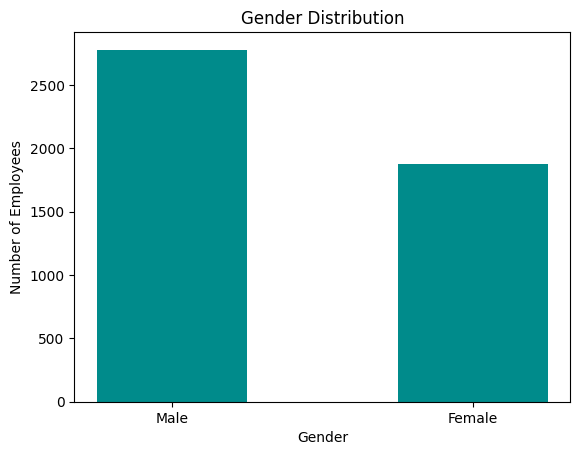

In [10]:
#value_counts - Returns the number of unique rows

gender_count=df["Gender"].value_counts().reset_index(name='count')

plt.bar(gender_count['Gender'], gender_count['count'], width=-0.5, color="DarkCyan")
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Gender Distribution')
plt.show()

#### 2.What is the Percentage of educational background of the employees?

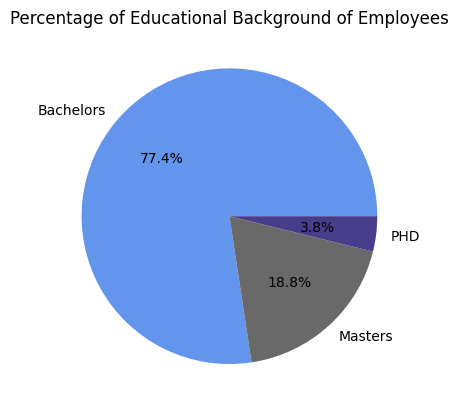

In [8]:
edu_dist = df['Education'].value_counts(normalize=True) * 100

plt.pie(edu_dist, labels=edu_dist.index, autopct='%1.1f%%', colors = ['CornflowerBlue', 'DimGray', 'DarkSlateBlue'] )
plt.title('Percentage of Educational Background of Employees')
plt.show()

#### 3.How many employees joined the company in each year?

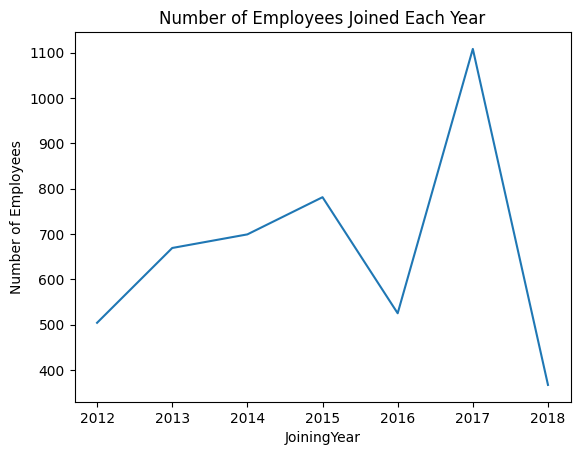

In [11]:
no_emp=df.groupby('JoiningYear')['Education'].count().reset_index(name='count')

plt.plot(no_emp['JoiningYear'], no_emp['count'])
plt.xlabel('JoiningYear')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Joined Each Year')
plt.show()

#### 4.What percentage of employees have ever been benched by gender?

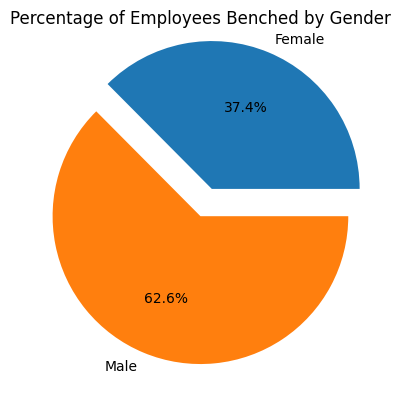

In [4]:
benched_by_gender = df[df['EverBenched'] == 'Yes'].groupby('Gender').size()
total_by_gender = df.groupby('Gender').size()
percent_benched_by_gender = (benched_by_gender / total_by_gender) * 100
myexplode = [0.2, 0]

colors = ['#ff9999', '#66cc99']

plt.pie(benched_by_gender, labels=percent_benched_by_gender.index, autopct='%1.1f%%', explode=myexplode)
plt.title('Percentage of Employees Benched by Gender')
plt.show()

#### 5.What is the distribution of employees across different cities?

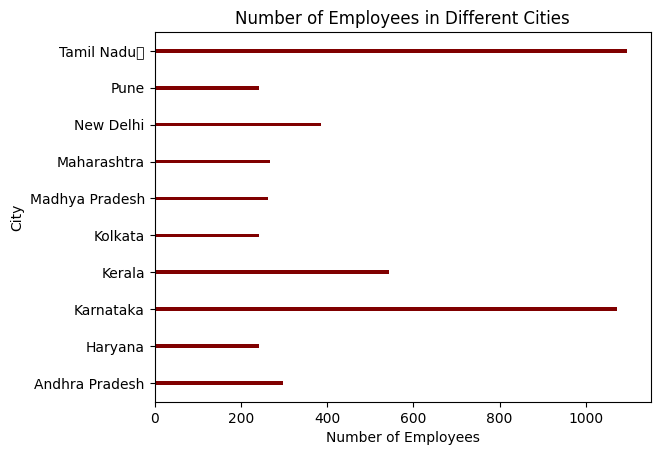

In [11]:
emp_count=df.groupby('City').size().reset_index(name='count')

plt.barh(emp_count['City'],emp_count['count'], height = 0.1,color="Maroon")
plt.xlabel('Number of Employees')
plt.ylabel('City')
plt.title('Number of Employees in Different Cities')
plt.show()

#### 6.How many males and females are there within each education level?

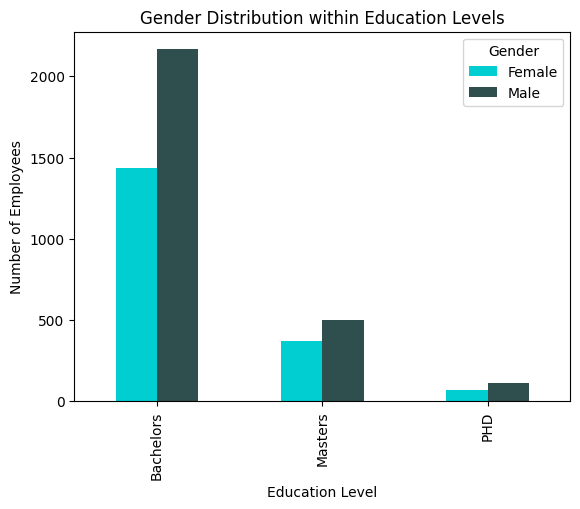

In [12]:
counts = df.groupby(["Education", "Gender"]).size().unstack()

counts.plot(kind='bar',color=("DarkTurquoise","DarkSlateGrey"))
plt.title('Gender Distribution within Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.show()

#### 7.What is the count of employees leaving for each city?

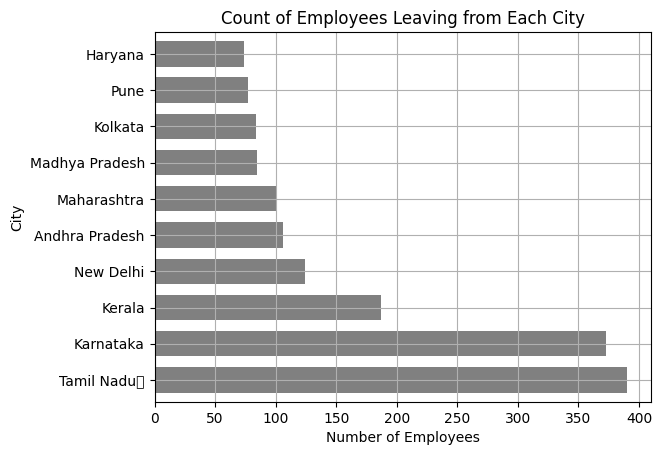

In [15]:
leave= df[df['LeaveOrNot'] == 1]
leave_count=leave['City'].value_counts() 

fig,ax= plt.subplots()
leave_count.plot.barh(leave_count,ax=ax,color="Grey",width=0.7)
ax.grid(True)
plt.xlabel('Number of Employees')
plt.title('Count of Employees Leaving from Each City')
plt.show()

#### 8.Which year saw the highest number of employees leaving the organization?

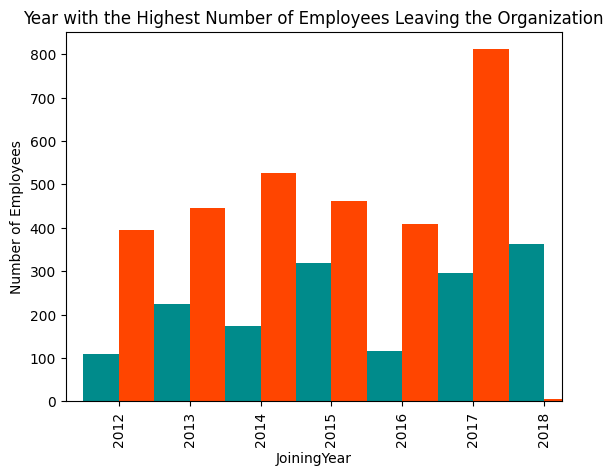

In [16]:
leave_counts = df.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack(fill_value=0)

fig, ax = plt.subplots()
leave_counts[0].plot(kind='bar',position=0, ax=ax,color="OrangeRed",)
leave_counts[1].plot(kind='bar',position=1, ax=ax,color="DarkCyan")

plt.ylabel('Number of Employees')
plt.title('Year with the Highest Number of Employees Leaving the Organization')
plt.show()